# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

**Технологический процесс**

  *  Rougher feed — исходное сырье
  *  Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
      
      *  Xanthate — ксантогенат (промотер, или активатор флотации);
      *  Sulphate — сульфат (на данном производстве сульфид натрия);
      *  Depressant — депрессант (силикат натрия).
  *  Rougher process (англ. «грубый процесс») — флотация
  *  Rougher tails — отвальные хвосты
  *  Float banks — флотационная установка
  *  Cleaner process — очистка
  *  Rougher Au — черновой концентрат золота
  *  Final Au — финальный концентрат золота

**Параметры этапов**

  *  air amount — объём воздуха
  *  fluid levels — уровень жидкости
  *  feed size — размер гранул сырья
  *  feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag


**Возможные значения для блока** [этап]:

  *  rougher — флотация
  *  primary_cleaner — первичная очистка
  *  secondary_cleaner — вторичная очистка
  *  final — финальные характеристики


**Возможные значения для блока** [тип_параметра]:

  *  input — параметры сырья
  *  output — параметры продукта
  *  state — параметры, характеризующие текущее состояние этапа
  *  calculation — расчётные характеристики



## Подготовка данных

### Открываем и узучаем данные

#### Импортируем библиотеки

In [1]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor


#### Откроем у изучим обучающую выборку

In [2]:
try:
    data_train = pd.read_csv('/DS/datasets/Sbor_project_2/gold_industry_train.csv')
except:
    data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [3]:
data_train

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
data_train.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol                     920
rougher.state.floatbank10_e_air                       429
rougher.input.floatbank11_xanthate                    407
primary_cleaner.output.concentrate_sol                265
final.output.concentrate_sol                          192
rougher.input.feed_size                               101
secondary_cleaner.state.floatbank2_a_air               94
primary_cleaner.output.concentrate_pb                  88
rougher.input.feed_sol                                 77
final.output.tail_pb                                   75
rougher.input.feed_pb                                  72
primary_cleaner.input.xanthate                         61
primary_cleaner.output.tail_sol                        45
rougher.input.floatbank11_sulfate                      36
rougher.input.floatbank10_sulfate                      31
primary_cleaner.input.depressant                       28
primary_cleaner.input.sulfate                          23
secondary_clea

In [6]:
data_train.duplicated().sum()

0

In [7]:
data_train.date.value_counts().sum()

14579

In [8]:
data_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14150.000000,14579.000000,14579.000000,14579.000000,14543.000000,14172.000000,1.457800e+04,14578.000000,14578.000000,14579.000000,14579.000000,14579.000000,14579.000000,14561.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14556.000000,14551.000000,14579.000000,14518.000000,1.457600e+04,14579.000000,1.457600e+04,14579.000000,1.457900e+04,14579.000000,1.457800e+04,14579.000000,14579.000000,14579.000000,14491.000000,14314.000000,14579.000000,14575.000000,14573.000000,14534.000000,14485.000000,14579.000000,14557.000000,14579.000000,14567.000000,14579.000000,14579.000000,14579.000000,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14578.000000,14575.000000,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579

#### Откроем и изучим тестовую выборку


In [9]:
try:
    data_test = pd.read_csv('/DS/datasets/Sbor_project_2/gold_industry_test.csv')
except:
    data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [10]:
data_test.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [12]:
data_test.isna().sum().sort_values(ascending=False)

secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air                 7
rougher.input.feed_rate                         4
rougher.input.floatbank10_sulfate               3
primary_cleaner.state.floatbank8_d_air          2
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_d_level        1
secondary_cleaner.state.floatbank3_a_level      1
secondary_cleaner.state.floatbank2_a_level      1
secondary_cleaner.state.floatbank2_b_air        1
secondary_cleaner.state.floatbank2_b_level      1
secondary_cleaner.state.floatbank3_a_air        1
secondary_cleaner.state.floatbank4_a_air        1


In [13]:
data_test.duplicated().sum()

0

In [14]:
data_test.date.value_counts().sum()

4860

#### Откроем и изучим исходные данные

In [15]:
try:
    data_full = pd.read_csv('/DS/datasets/Sbor_project_2/gold_industry_full.csv')
except:
    data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [16]:
data_full

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [17]:
data_full.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol                     1748
rougher.input.floatbank11_xanthate                     453
rougher.state.floatbank10_e_air                        436
primary_cleaner.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air               220
final.output.concentrate_sol                           211
rougher.input.feed_size                                145
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.input.xanthate                         104
final.output.tail_pb                                   101
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
primary_cleaner.output.tail_sol                         62
rougher.input.floatbank11_sulfate                       44
primary_cleaner.input.depressant                        37
rougher.input.floatbank10_sulfate                       34
primary_cleaner.input.sulfate                           

<div style="border:solid green 2px; padding: 20px">

**Коментарий:** 
    
* В данных отсутствуют явные дубликаты, но есть пропуски. В колонке-ключе `date` все значения уникальны.
* В тестовой выборке отсутствуют некоторые признаки имеющиеся в тренировочной выборке.


### Проверим правильность расчета эффективности обогащения

In [18]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

recovery = (C * (F - T))/(F * (C - T)) * 100

target = data_train['rougher.output.recovery']

MAE = mean_absolute_error(target, recovery)

f'Среднее абсолютное отклонение: {MAE}'

'Среднее абсолютное отклонение: 9.83758577644259e-15'

<div style="border:solid green 2px; padding: 20px">

**Коментарий:** эффективность обошащения в данных расчитана корректно, о чем говорит небольшое значение "среднего абсолютного отклонения" близкое к нулю.

### Проанализируем признаки, недоступные в тестовой выборке


In [19]:
colum = (data_train.columns ^ data_test.columns).tolist()
colum

/var/folders/4j/8kjfrhz9495f644m80trhd6m0000gn/T/ipykernel_59072/1897311795.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  colum = (data_train.columns ^ data_test.columns).tolist()


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [20]:
len(colum)

34

<div style="border:solid green 2px; padding: 20px">

**Коментарий:** 
    
Количество признаков недоступных в тестовой выборке 34:
    
 * 9 признаков `final` - финальные характеристики: относятся к типу `output` - параметры продукта;
 * 8 признаков `primary_cleaner` - первичной очистки: относятся к типу `output` - параметры продукта;
 * 13 признаков `rougher` - флотации: 9 из них относятся к типу `output` - параметры продукта, а 4 к типу `calculation` - расчетные характеристики;
 * 4 признака `secondary_cleaner` - вторичной очистки: относятся к типу `output` - параметры продукта.

### Проведем предобработку данных

#### Заполним пропуски

In [21]:
data_train = data_train.fillna(method='ffill')
data_train.isna().sum()

date                                                  0
rougher.input.feed_au                                 0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_sol                                0
rougher.input.feed_rate                               0
rougher.input.feed_size                               0
rougher.input.floatbank10_sulfate                     0
rougher.input.floatbank10_xanthate                    0
rougher.state.floatbank10_a_air                       0
rougher.state.floatbank10_a_level                     0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                 

In [22]:
data_test = data_test.fillna(method='ffill')
data_test.isna().sum()

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

In [23]:
data_full = data_full.fillna(method='ffill')
data_full.isna().sum()

date                                                  0
rougher.input.feed_au                                 0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_sol                                0
rougher.input.feed_rate                               0
rougher.input.feed_size                               0
rougher.input.floatbank10_sulfate                     0
rougher.input.floatbank10_xanthate                    0
rougher.state.floatbank10_a_air                       0
rougher.state.floatbank10_a_level                     0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_e_air                 

<div style="border:solid green 2px; padding: 20px">

**Коментарий:** Пропуски заполнили предудыщими значениями в столбцах, т.к. они более реалистичны к данным значениям, чем среднее или медиана.

#### Добавим в тестовую выборку целевые признаки


In [24]:
data_test.shape

(4860, 53)

In [25]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

In [26]:
data_test.shape

(4860, 55)

#### Удалим из обучающей выборке признаки отсутствующие в тестовой кроме целевых

In [27]:
len(colum)

34

In [28]:
colum.remove('rougher.output.recovery') 
colum.remove('final.output.recovery') 

len(colum)

32

In [29]:
data_train.shape

(14579, 87)

In [30]:
data_train.drop(colum, axis=1, inplace=True)
data_train.shape

(14579, 55)

#### Удалим признак `date - дата` в обучающей и тестовой выборке 

In [31]:
data_train.drop('date', axis=1, inplace=True)
data_train.shape

(14579, 54)

In [32]:
data_test.drop('date', axis=1, inplace=True)
data_test.shape

(4860, 54)

<div style="border:solid green 2px; padding: 20px">

**Коментарий:** дынный признак никак не влияет на обучение модели

## Анализ данных

### Проанализируем как меняется концентрация металлов (Au-золото, Ag-серебро, Pb-свинец) на различных этапах.

In [33]:
display('Концентрация металлов в сырье:')
display(f'Золота: {data_full["rougher.input.feed_au"].mean()}, Серебра: {data_full["rougher.input.feed_ag"].mean()}\
, Свинца: {data_full["rougher.input.feed_pb"].mean()}')
print()
display('В черновом концентрате:')
display('Золота: {}, Серебра: {}, Свинца: {}'.format(data_full['rougher.output.concentrate_au'].mean(),\
      data_full['rougher.output.concentrate_ag'].mean(), data_full['rougher.output.concentrate_pb'].mean()))
print()
display('В концентрате после первой очистки:')
display('Золота: {}, Серебра: {}, Свинца: {}'.format(data_full['primary_cleaner.output.concentrate_au'].mean(),\
      data_full['primary_cleaner.output.concentrate_ag'].mean(),\
      data_full['primary_cleaner.output.concentrate_pb'].mean()))
print()
display('Финальном концентрате:')
display('Золота: {}, Серебра: {}, Свинца: {}'.format(data_full['final.output.concentrate_au'].mean(),\
        data_full['final.output.concentrate_ag'].mean(), data_full['final.output.concentrate_pb'].mean()))

'Концентрация металлов в сырье:'

'Золота: 8.266097326589103, Серебра: 8.794927425814688, Свинца: 3.584516259074396'

'В черновом концентрате:'

'Золота: 19.772000139486316, Серебра: 11.994759359873429, Свинца: 7.606272313195004'

'В концентрате после первой очистки:'

'Золота: 32.11940040787649, Серебра: 8.442408077719058, Свинца: 9.809276171540548'

'Финальном концентрате:'

'Золота: 44.0765129419528, Серебра: 5.1683869675102425, Свинца: 9.978821384192907'

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** 
    
* Заметное увеличение в 5.5 раз концентрации золота от руды до финального концентрата, что и следовало ожидать.
* Концентрация серебра во время всего технологического процесса колебалась, но в финальном концентрате уменьшилась по сравнению с рудой 1.6 раза.
* Концентрация свинца увеличилась практически в 3 раза к концу технологического процесса.

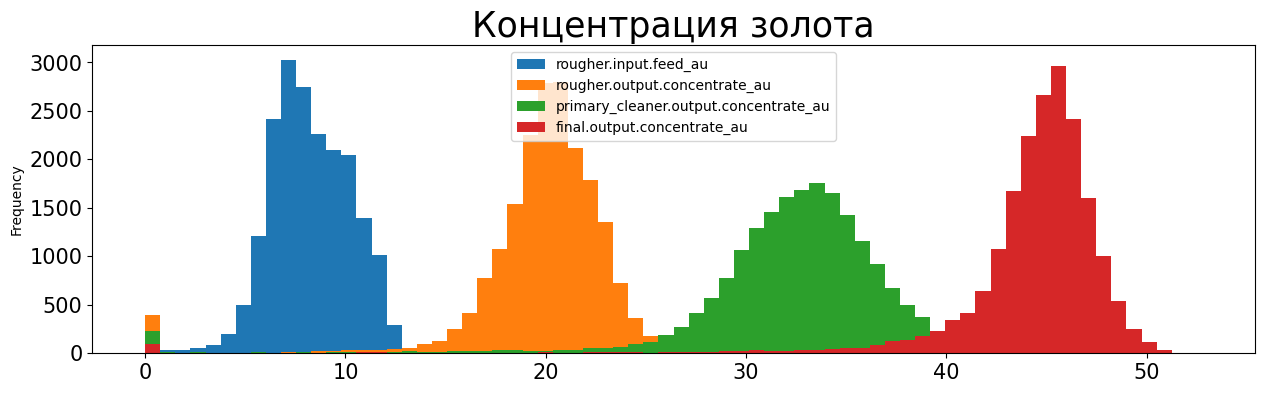

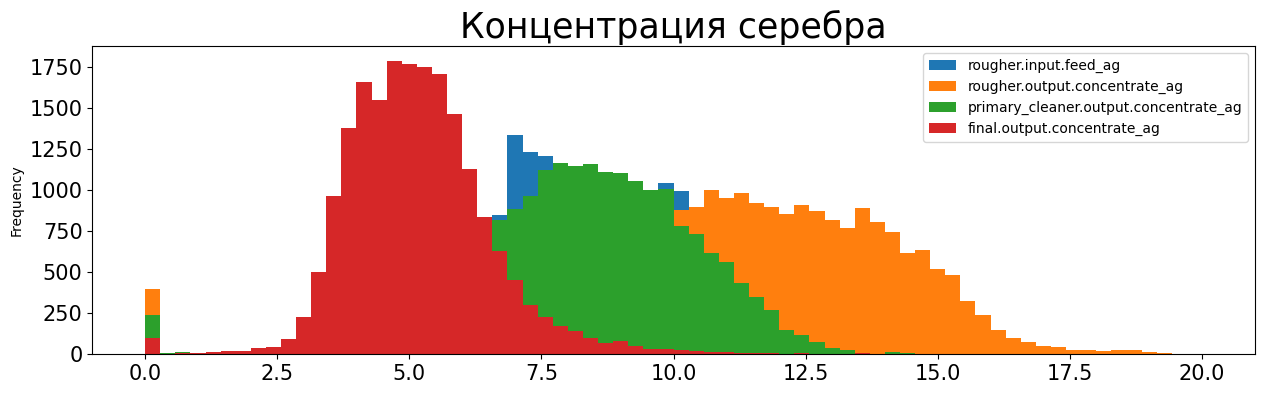

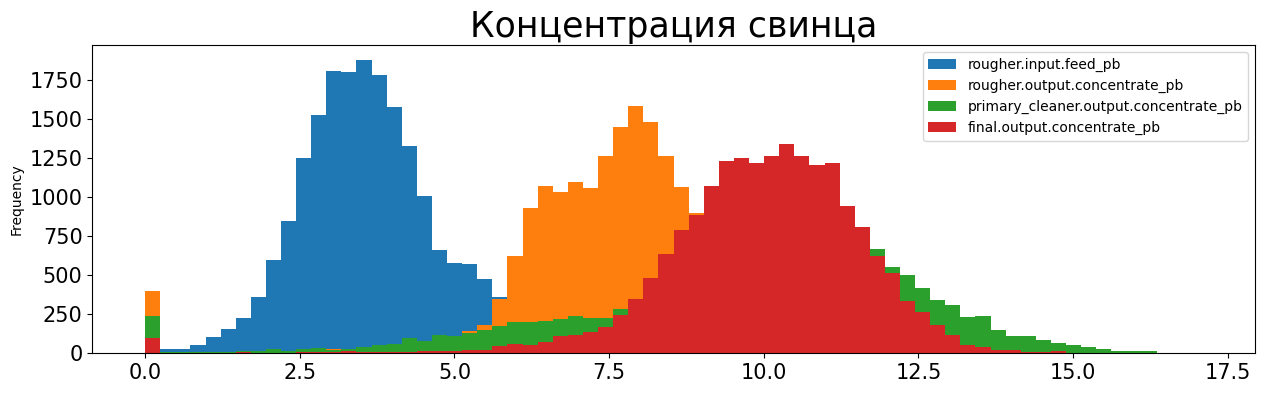

In [34]:
data_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',\
          'final.output.concentrate_au']].plot(kind='hist', bins=70, figsize=(15,4), fontsize=15);
plt.title('Концентрация золота', fontsize=25)

data_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',\
          'final.output.concentrate_ag']].plot(kind='hist', bins=70, figsize=(15,4), fontsize=15, range=(0, 20));
plt.title('Концентрация серебра', fontsize=25)

data_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',\
          'final.output.concentrate_pb']].plot(kind='hist', bins=70, figsize=(15,4), fontsize=15);
plt.title('Концентрация свинца', fontsize=25)
plt.show()

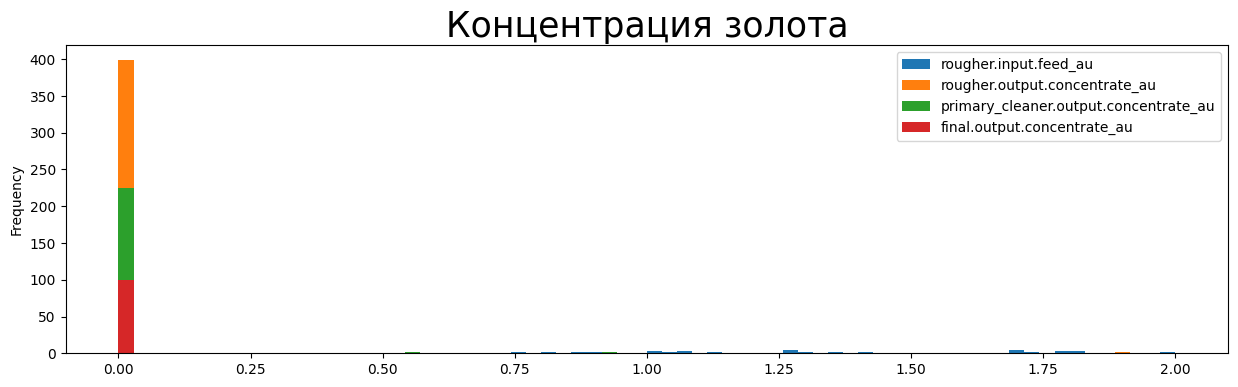

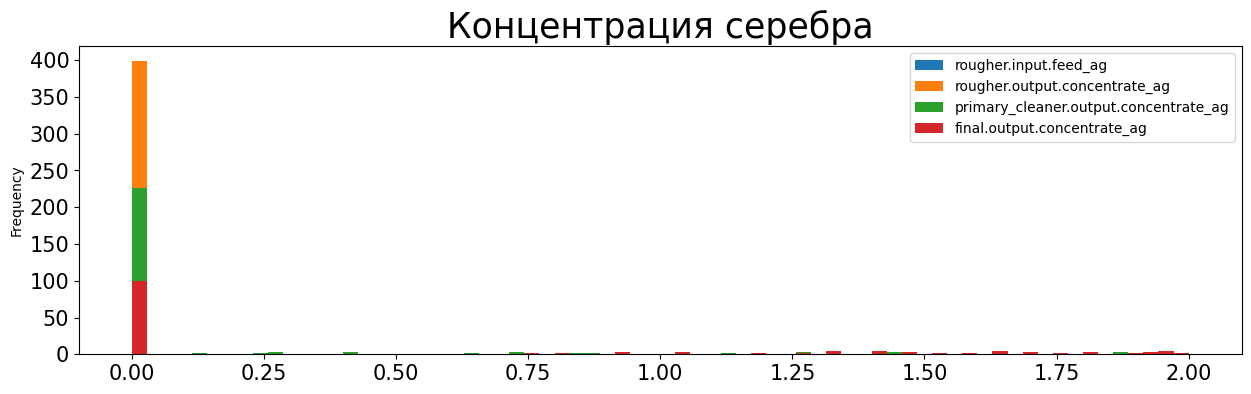

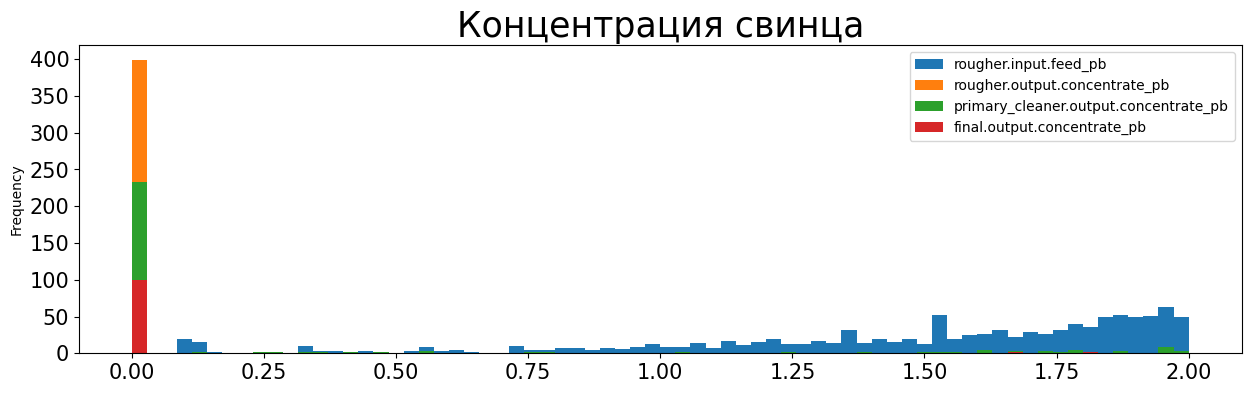

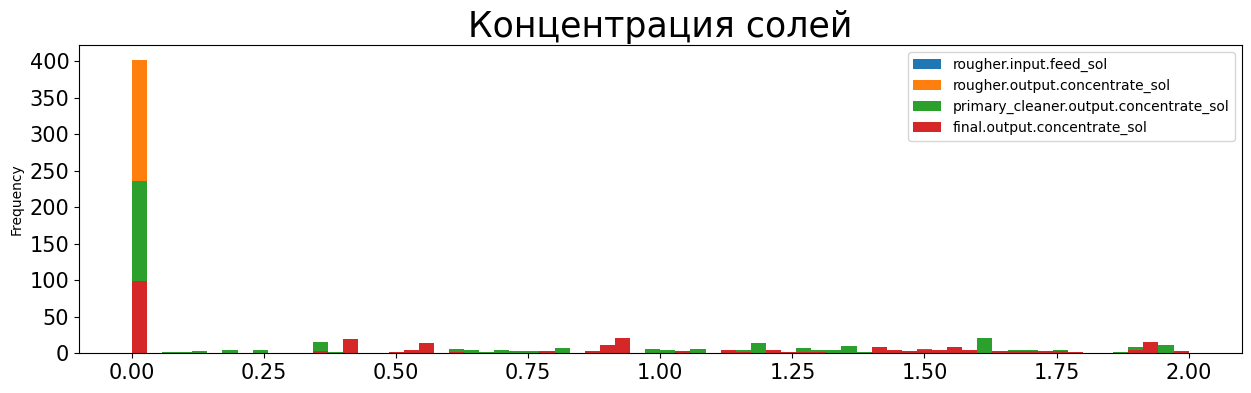

In [35]:
data_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',\
          'final.output.concentrate_au']].plot(kind='hist', bins=70, figsize=(15,4), range=(0,2));
plt.title('Концентрация золота', fontsize=25)

data_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',\
          'final.output.concentrate_ag']].plot(kind='hist', bins=70, figsize=(15,4), fontsize=15, range=(0, 2));
plt.title('Концентрация серебра', fontsize=25)

data_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',\
          'final.output.concentrate_pb']].plot(kind='hist', bins=70, figsize=(15,4), fontsize=15, range=(0,2));
plt.title('Концентрация свинца', fontsize=25)

data_full[['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol',\
          'final.output.concentrate_sol']].plot(kind='hist', bins=70, figsize=(15,4), fontsize=15, range=(0,2));
plt.title('Концентрация солей', fontsize=25)

plt.show()



<div style="border:solid green 2px; padding: 20px">

**Коментарии:** на графиках видны анамалии в концентрациях метталов и солей в районе 0.

#### Удалим анамалии из тренировочной и тестовой выборках 

In [36]:
data_train.shape

(14579, 54)

In [37]:
data_train = data_train[(data_train['rougher.input.feed_au'] >= 1) & (data_train['rougher.input.feed_ag'] >= 1) &\
                       (data_train['rougher.input.feed_pb'] >= 1) & (data_train['rougher.input.feed_sol'] >= 1)]\
.reset_index(drop=True)


In [38]:
data_test = data_test[(data_test['rougher.input.feed_au'] >= 1) & (data_test['rougher.input.feed_ag'] >= 1) &\
                       (data_test['rougher.input.feed_pb'] >= 1) & (data_test['rougher.input.feed_sol'] >= 1)]\
.reset_index(drop=True)


In [39]:
data_train.shape

(14464, 54)

### Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

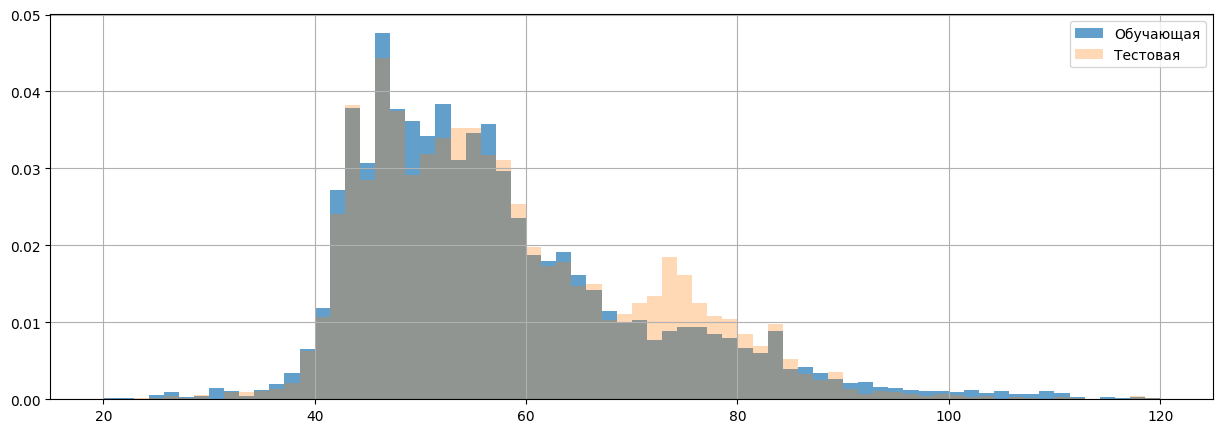

In [40]:
data_train['rougher.input.feed_size'].hist(bins=70, figsize=(15,5), label='Обучающая', range=(20, 120),\
                                           alpha=0.7, density=True)
data_test['rougher.input.feed_size'].hist(bins=70, range=(20,120), label='Тестовая', alpha=0.3, density=True)

plt.legend();

### Исследуем суммарную концентрацию металлов на разных стадиях

In [41]:
display('Суммарная концентрация металлов в сырье:')
display(f'Золота: {data_full["rougher.input.feed_au"].sum()}, Серебра: {data_full["rougher.input.feed_ag"].sum()}\
, Свинца: {data_full["rougher.input.feed_pb"].sum()}, Солей: {data_full["rougher.input.feed_sol"].sum()}')
print()
display('В черновом концентрате:')
display('Золота: {}, Серебра: {}, Свинца: {}, Солей: {}'.format(data_full['rougher.output.concentrate_au'].sum(),\
      data_full['rougher.output.concentrate_ag'].sum(), data_full['rougher.output.concentrate_pb'].sum(),\
      data_full['rougher.output.concentrate_sol'].sum()))
print()
display('В концентрате после первой очистки:')
display('Золота: {}, Серебра: {}, Свинца: {}, Солей: {}'.format(data_full['primary_cleaner.output.concentrate_au']\
      .sum(), data_full['primary_cleaner.output.concentrate_ag'].sum(),\
      data_full['primary_cleaner.output.concentrate_pb'].sum(),\
      data_full['primary_cleaner.output.concentrate_sol'].sum()))
print()
display('Финальном концентрате:')
display('Золота: {}, Серебра: {}, Свинца: {}, Солей: {}'.format(data_full['final.output.concentrate_au'].sum(),\
        data_full['final.output.concentrate_ag'].sum(), data_full['final.output.concentrate_pb'].sum(),\
        data_full['final.output.concentrate_sol'].sum()))

'Суммарная концентрация металлов в сырье:'

'Золота: 160684.66593156557, Серебра: 170964.59423041172, Свинца: 69679.41156014719, Солей: 712958.1617327845'

'В черновом концентрате:'

'Золота: 384347.9107114745, Серебра: 233166.1271965796, Свинца: 147858.3274961977, Солей: 559810.9934242333'

'В концентрате после первой очистки:'

'Золота: 624369.0245287111, Серебра: 164111.97062278076, Свинца: 190682.5194985767, Солей: 201920.63715886662'

'Финальном концентрате:'

'Золота: 856803.3350786205, Серебра: 100468.27426143161, Свинца: 193978.30888732593, Солей: 183317.36354930865'

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** 
    
    Как и в придыдущем наблюдении:
    
* Заметное увеличение в 5.3 раз концентрации золота от руды до финального концентрата, что и следовало ожидать.
* Концентрация серебра во время всего технологического процесса колебалась, но в финальном концентрате уменьшилась по сравнению с рудой 1.3 раза.
* Концентрация свинца увеличилась практически в 3 раза к концу технологического процесса.
* Концентрация солей упала от начала процесса к концу в 3.9 раза

## Модель

### Напишем функцию для вычисления итоговой sMAPE

In [42]:
def sMAPE(actual, pred):
    return (abs(actual-pred)/((abs(actual)+abs(pred))/2)).mean()*100

In [43]:
def final_sMAPE(sMAPE_rouger, sMAPE_final):
    return 0.25*sMAPE_rouger + 0.75*sMAPE_final

In [44]:
custom_score = make_scorer(sMAPE, greater_is_better=False)

### Обучим модели

#### Разделим тренировочную и тестовую выборку на признаки и целевые признаки

In [45]:
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
rougher_target_train = data_train['rougher.output.recovery']
final_target_train = data_train['final.output.recovery']

features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
rougher_target_test = data_test['rougher.output.recovery']
final_target_test = data_test['final.output.recovery']

state = np.random.RandomState(12345)

#### Линейная регрессия

In [46]:
model_rougher = LinearRegression()
model_final = LinearRegression()

LR_rougher = pd.Series(cross_val_score(model_rougher, features_train, rougher_target_train,\
                                       scoring=custom_score)).mean()
LR_final = pd.Series(cross_val_score(model_final, features_train, final_target_train, scoring=custom_score)).mean()

display(f'sMAPE исходного сырья для линейной регрессии: {LR_rougher}')
display(f'sMAPE финальных характеристик для линейной регрессии: {LR_final}')
f'Итоговое sMAPE линейной регрессии: {final_sMAPE(LR_rougher, LR_final)}'

'sMAPE исходного сырья для линейной регрессии: -13.727979437993458'

'sMAPE финальных характеристик для линейной регрессии: -10.928329225838429'

'Итоговое sMAPE линейной регрессии: -11.628241778877186'

#### Дерево решений

In [47]:
best_rougher = - 10000
best_depth_rougher = 0
for depth in range(1, 11):
    model_rougher = DecisionTreeRegressor(random_state=state, max_depth=depth)
    cross_rougher = pd.Series(cross_val_score(model_rougher, features_train, rougher_target_train,\
                                              scoring=custom_score)).mean()
    
    if cross_rougher > best_rougher:
        best_rougher = cross_rougher
        best_depth_rougher = depth
        
best_final = -10000
best_depth_final = 0
for depth in range(1, 11):
    model_final = DecisionTreeRegressor(random_state=state, max_depth=depth)
    cross_final = pd.Series(cross_val_score(model_final, features_train, final_target_train,\
                                            scoring=custom_score)).mean()
    
    if cross_final > best_final:
        best_final = cross_final
        best_depth_final = depth
        
display('sMAPE исходного сырья для дерева решений: {}, глубиной деревьев: {}'\
        .format(best_rougher, best_depth_rougher))
display('sMAPE финальных характеристик для дерева решений: {}, глубиной деревьев: {}'\
        .format(best_final, best_depth_final))
f'Итоговое sMAPE для дерева решений: {final_sMAPE(best_rougher, best_final)}'

'sMAPE исходного сырья для дерева решений: -13.716977392998933, глубиной деревьев: 4'

'sMAPE финальных характеристик для дерева решений: -10.208906076887452, глубиной деревьев: 2'

'Итоговое sMAPE для дерева решений: -11.085923905915323'

#### Cлучайный лес

In [48]:
%%time

param_grid = {'n_estimators': range(10, 31, 10),
              'max_depth': range(1, 6)}

model_rougher = RandomForestRegressor(random_state=state)
search = GridSearchCV(model_rougher, param_grid, n_jobs=-1, scoring=custom_score)
search.fit(features_train, rougher_target_train)

rougher = search.best_score_
rf_rougher_model = search.best_estimator_

'sMAPE исходного сырья для рещающего леса: {}, с параметрами леса: {}'.format(rougher, search.best_params_)

CPU times: user 8.1 s, sys: 212 ms, total: 8.31 s
Wall time: 2min 6s


"sMAPE исходного сырья для рещающего леса: -13.211955279488299, с параметрами леса: {'max_depth': 4, 'n_estimators': 30}"

In [49]:
%%time

param_grid = {'n_estimators': range(10, 31, 10),
              'max_depth': range(1, 6)}

model_final = RandomForestRegressor(random_state=state)
search = GridSearchCV(model_final, param_grid, n_jobs=-1, scoring=custom_score)
search.fit(features_train, final_target_train)

final = search.best_score_
rf_final_model = search.best_estimator_

'sMAPE финальных характеристик для рещающего леса: {}, с параметрами леса: {}'.format(final, search.best_params_)

CPU times: user 2.92 s, sys: 60.6 ms, total: 2.98 s
Wall time: 1min 46s


"sMAPE финальных характеристик для рещающего леса: -10.141901724041315, с параметрами леса: {'max_depth': 2, 'n_estimators': 20}"

In [50]:
f'Итоговое sMAPE для решающего леса: {final_sMAPE(rougher, final)}'

'Итоговое sMAPE для решающего леса: -10.90941511290306'

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** по всем показателям модель "Слечайный лес" является лучшей моделью. По её наилучшим параметрам проверим модель на тестовой выборке.


#### Проверим лучшую модель на тестовой выборке

In [51]:
pred_test_rougher = rf_rougher_model.predict(features_test)
pred_test_final = rf_final_model.predict(features_test)

sMAPE_rougher = sMAPE(rougher_target_test, pred_test_rougher)
sMAPE_final = sMAPE(final_target_test, pred_test_final)


display(f'sMAPE исходного сырья лучшей модели: {sMAPE_rougher}')
display(f'sMAPE финальных характеристик лучшей модели: {sMAPE_final}')
f'Итоговое sMAPE лучшей модели: {final_sMAPE(sMAPE_rougher, sMAPE_final)}'

'sMAPE исходного сырья лучшей модели: 5.518867439505222'

'sMAPE финальных характеристик лучшей модели: 8.45097986104627'

'Итоговое sMAPE лучшей модели: 7.717951755661007'

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** по лучшим моделям "Решающего леса" на тестовой выборке и получили итоговый sMAPE: 7.717951755661007

#### Сравним с дамми моделью

In [52]:
dm_rougher_model = DummyRegressor(strategy='median')
dm_final_model = DummyRegressor(strategy='median')

dm_rougher_model.fit(features_train, rougher_target_train)
dm_final_model.fit(features_train, final_target_train)

dm_pred_test_rougher =dm_rougher_model.predict(features_test)
dm_pred_test_final = dm_final_model.predict(features_test)

sMAPE_rougher_dm = sMAPE(rougher_target_test, dm_pred_test_rougher)
sMAPE_final_dm = sMAPE(final_target_test, dm_pred_test_final)


display(f'sMAPE исходного сырья дамми модели: {sMAPE_rougher_dm}')
display(f'sMAPE финальных характеристик дамми модели: {sMAPE_final_dm}')
f'Итоговое sMAPE дамми модели: {final_sMAPE(sMAPE_rougher_dm, sMAPE_final_dm)}'

'sMAPE исходного сырья дамми модели: 5.860458015565359'

'sMAPE финальных характеристик дамми модели: 9.043515240220726'

'Итоговое sMAPE дамми модели: 8.247750934056883'

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** сравнили нашу лучшую модель с "Дамми" моделью: 7.717951755661007 - наша модель, 8.247750934056883 - "Дамми" модель. Результат в пользу нашей модели по всем характеристикам.